<a href="https://colab.research.google.com/github/ArturBudniak/small_tasks/blob/main/zadanie_1_refundacje_recept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#wczytaj dane z pliku csv
#link to the file with data https://drive.google.com/file/d/1edCIlAd-jq4epRh-IAhQ7kmdmlemgXoN/view?usp=share_link
downloaded = drive.CreateFile({'id':"1edCIlAd-jq4epRh-IAhQ7kmdmlemgXoN"})
downloaded.GetContentFile('filename.csv')
df = pd.read_csv('filename.csv', sep=";")

In [ ]:
df.head()

,Apteka,Recepta,Refundacja
0,A,1,"130,72"
1,A,2,"226,78"
2,A,3,"163,75"
3,A,4,"174,88"
4,A,5,"213,6"


In [ ]:
# sprawdź poprawność nazw aptek: od A do G
df["Apteka"].unique()

# Poprawne

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
# sprawdź poprawność ID recept
df["Recepta"].isna().any()

# False oznacza, że nie ma brakujących ID

False

In [ ]:
# zmień typ Recepta na int
df["Recepta"] = df["Recepta"].astype(int)

In [ ]:
# sprawdź poprawność wartości refundacji
df["Refundacja"].isna().any()

# False oznacza, że nie ma brakujących wartości refundacji

False

In [ ]:
# zmień , na .
df["Refundacja"].replace(to_replace=',', value='.', regex=True, inplace=True)

In [ ]:
# zmeń typ Refundacji na float
df["Refundacja"] = df["Refundacja"].astype(float)

In [ ]:
# oblicz średnie dla każdej z aptek
lista_srednich =[]
for apteka in df["Apteka"].unique():
  lista_srednich.append(df.loc[df['Apteka'] == apteka, 'Refundacja'].mean())

In [ ]:
# oblicz odchylenia standardowe dla każdej z aptek
lista_odch_std =[]
for apteka in df["Apteka"].unique():
  lista_odch_std.append(df.loc[df['Apteka'] == apteka, 'Refundacja'].std())

In [ ]:
# oblicz n odchylen std

#n=6 dobrane empirycznie
n=6
lista_n_odch_std = np.multiply (lista_odch_std,n)

In [ ]:
# oblicz górne limity dla [średnia + 6 * odch_std]  -> to co ponad to, jest potencjalnym outlierem
lista_upper_limit = np.add(lista_srednich, lista_n_odch_std)

In [ ]:
# przypisz limity do aptek
lista_aptek = df["Apteka"].unique()
zipped = list(zip(lista_aptek, lista_upper_limit))
df_limity = pd.DataFrame(zipped, columns=["Apteka", "Gorny Limit"])

In [ ]:
df_limity

,Apteka,Gorny Limit
0,A,490.060846
1,B,426.157483
2,C,434.589128
3,D,460.347862
4,E,494.981728
5,F,417.748100
6,G,492.119250


In [ ]:
df= pd.merge(df, df_limity, on="Apteka")

In [ ]:
df

,Apteka,Recepta,Refundacja,Gorny Limit
0,A,1,130.72,490.060846
1,A,2,226.78,490.060846
2,A,3,163.75,490.060846
3,A,4,174.88,490.060846
4,A,5,213.60,490.060846
...,...,...,...,...
139995,G,139996,233.07,492.119250
139996,G,139997,165.11,492.119250
139997,G,139998,261.48,492.119250
139998,G,139999,240.49,492.119250


In [ ]:
# pokaż te wiersze, gdzie wartość refundacji jest większa od 6 sigm dla rozkładów danych aptek 
df[df["Gorny Limit"] < df["Refundacja"]]

,Apteka,Recepta,Refundacja,Gorny Limit
23174,B,23175,499.780,426.157483
24077,B,24078,476.780,426.157483
28794,B,28795,469.760,426.157483
36123,B,36124,514.460,426.157483
38435,B,38436,565.660,426.157483
67400,D,67401,565.175,460.347862
77886,D,77887,539.750,460.347862


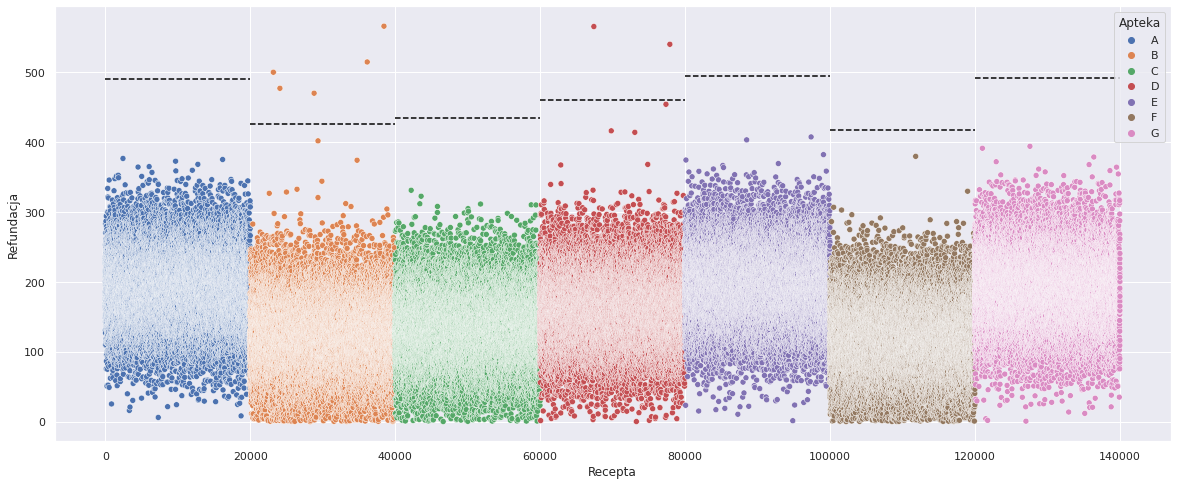

In [ ]:
sns.scatterplot(data=df, x='Recepta', y='Refundacja', hue='Apteka')
#plt.plot([df_limity["Gorny Limit"].iloc[0], 0], [20000, df_limity["Gorny Limit"].iloc[0]], linewidth=2)
plt.hlines(y = df_limity["Gorny Limit"].iloc[0], xmin=0, xmax=20000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[1], xmin=20000, xmax=40000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[2], xmin=40000, xmax=60000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[3], xmin=60000, xmax=80000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[4], xmin=80000, xmax=100000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[5], xmin=100000, xmax=120000, color ="black", linestyle ="--")
plt.hlines(y = df_limity["Gorny Limit"].iloc[6], xmin=120000, xmax=140000, color ="black", linestyle ="--")

sns.set(rc={'figure.figsize':(20,8)})
plt.legend(loc='upper right', title='Apteka')